In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns

In [2]:
sphere1 = pd.read_csv("../tables/sphere1_range.csv")
sphere2 = pd.read_csv("../tables/sphere2_range.csv")

In [3]:
columns = sphere2.columns

Making general and mean plots

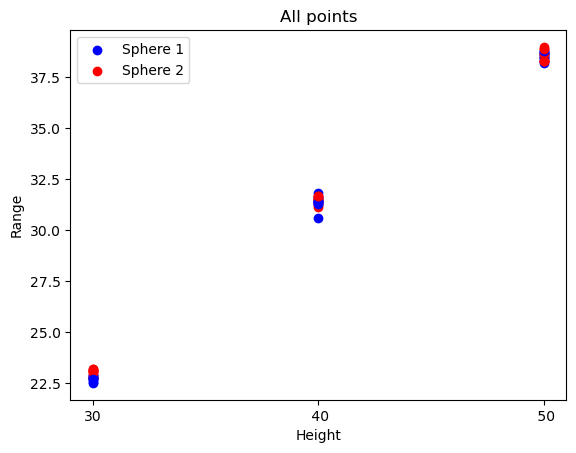

In [4]:
for h in columns:
    for range1, range2 in zip(sphere1[h], sphere2[h]):
        sph1 = plt.scatter(x=h, y=range1, color='blue')
        sph2 = plt.scatter(x=h, y=range2, color='red')
    
plt.xlabel("Height")
plt.ylabel("Range")

plt.title("All points")

plt.legend([sph1, sph2], ["Sphere 1", "Sphere 2"])
    
plt.show()

In [5]:
mean_sphere1 = [float] * 3
mean_sphere2 = [float] * 3

In [6]:
for i, h in zip(range(3), columns):
    mean_sphere1[i] = np.mean(sphere1[h])
    mean_sphere2[i] = np.mean(sphere2[h])

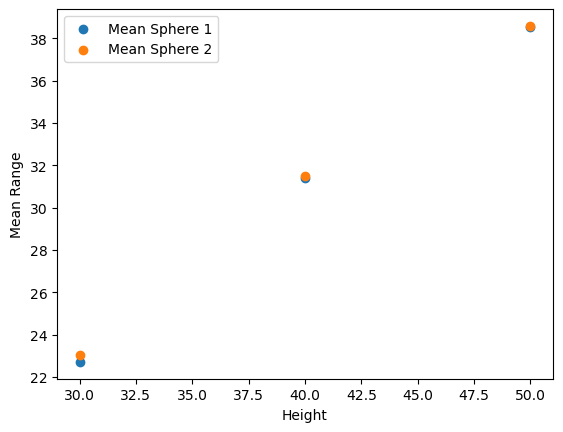

In [7]:
plt.scatter(x=[30, 40, 50], y=mean_sphere1, label="Mean Sphere 1")
plt.scatter(x=[30, 40, 50], y=mean_sphere2, label="Mean Sphere 2")
plt.xlabel("Height")
plt.ylabel("Mean Range")
plt.legend()
plt.show()

Calculating standard deviation

In [8]:
std_sphere1 = [np.std(sphere1[height]) for height in sphere1.columns]
std_sphere2 = [np.std(sphere2[height]) for height in sphere2.columns]
std_sphere1, std_sphere2

([0.11629703349613, 0.3049655718273784, 0.19163767896736705],
 [0.15198684153570652, 0.17748239349298867, 0.2683747380063938])

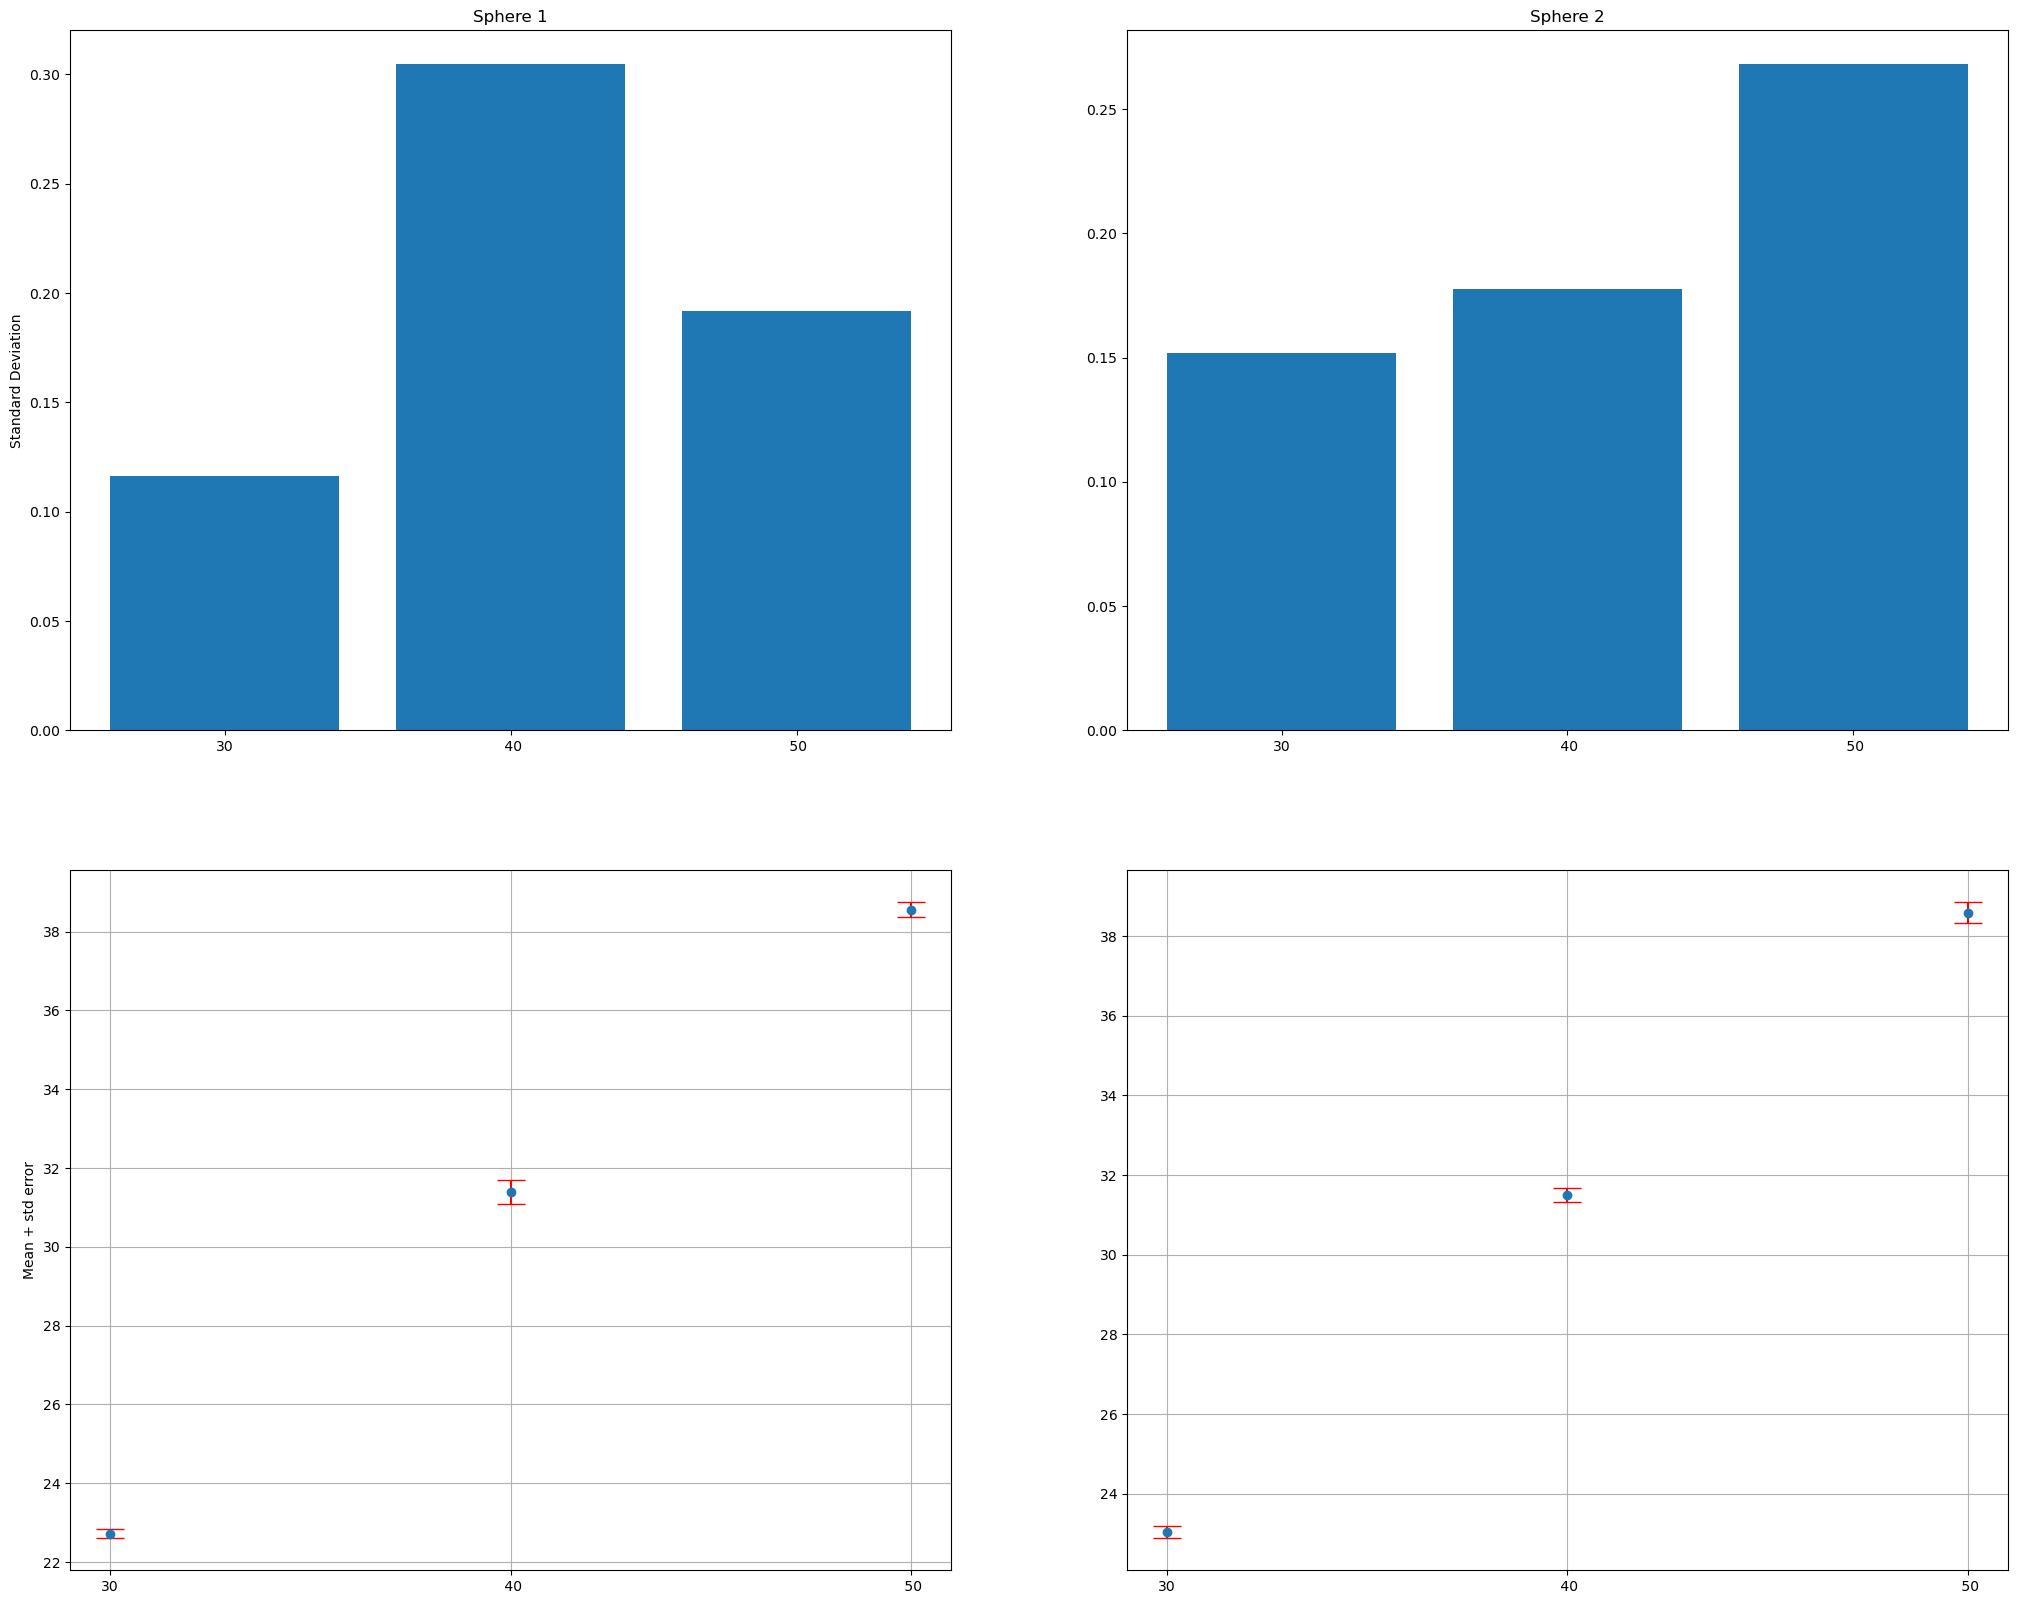

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

axes[0, 0].set_title("Sphere 1")
axes[0, 1].set_title("Sphere 2")

axes[0, 0].bar(sphere1.columns, std_sphere1)
axes[0, 0].set_ylabel("Standard Deviation")
axes[0, 1].bar(sphere2.columns, std_sphere2)

axes[1, 0].errorbar(columns, mean_sphere1, yerr=std_sphere1, fmt='o', ecolor='red', capsize=10)
axes[1, 0].grid(True)
axes[1, 0].set_ylabel("Mean + std error")
axes[1, 1].errorbar(columns, mean_sphere2, yerr=std_sphere2, fmt='o', ecolor='red', capsize=10)
axes[1, 1].grid(True)


plt.show()

Calculatin Distribuition

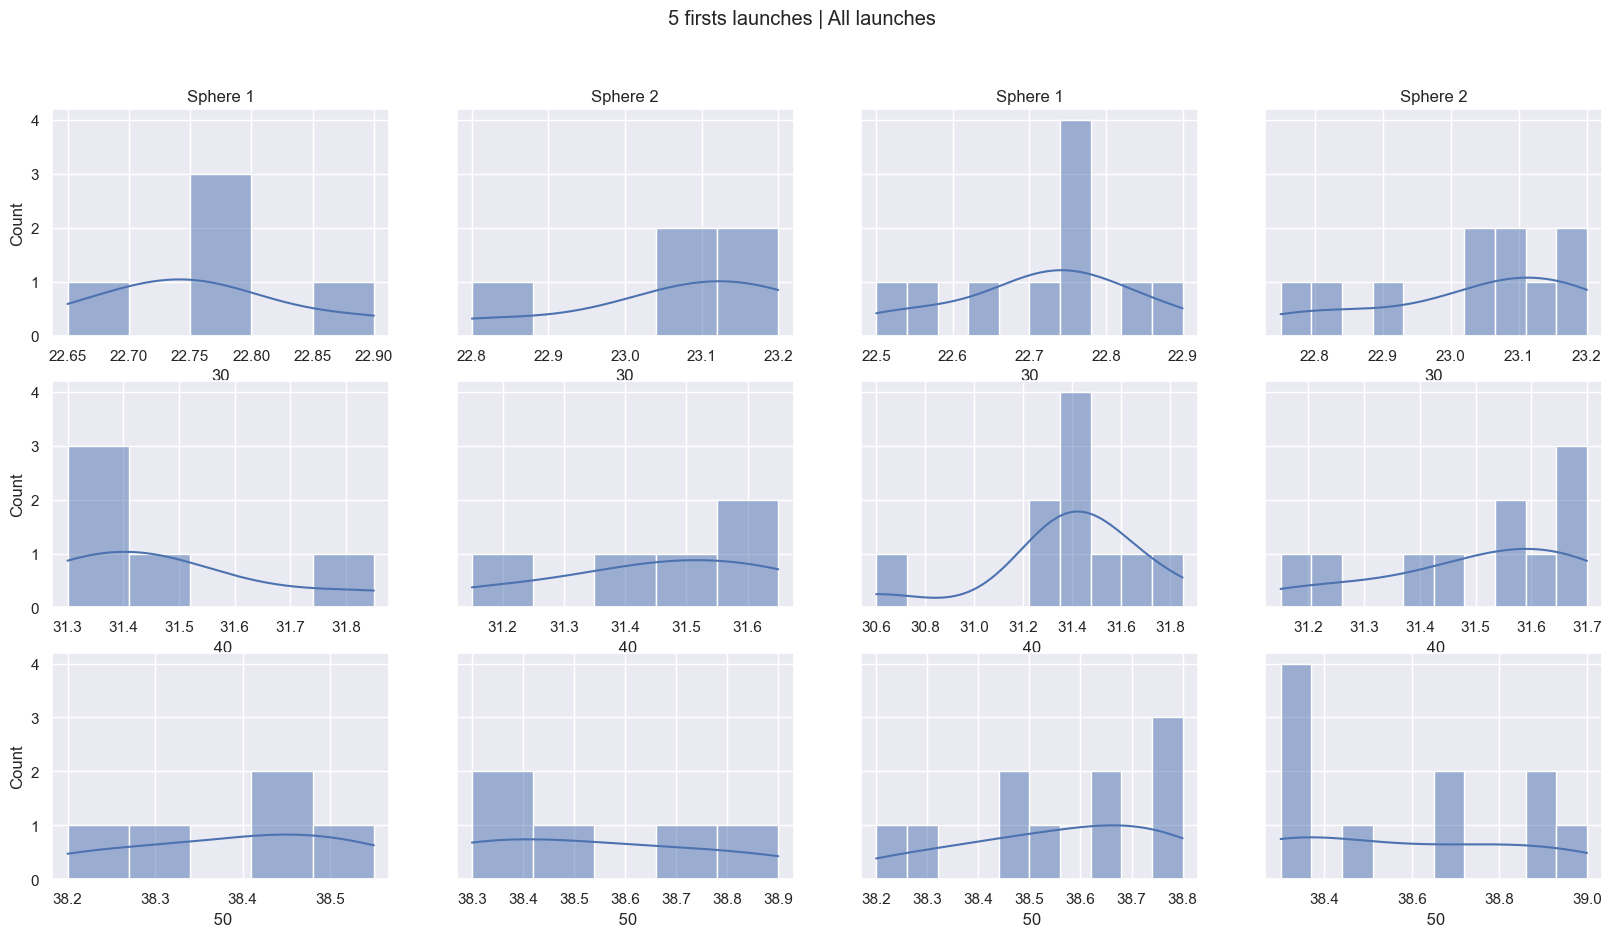

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10), sharey=True)
data = [sphere1, sphere2]

fig.suptitle("5 firsts launches | All launches")

axes[0, 0].set_title("Sphere 1")
axes[0, 1].set_title("Sphere 2")

for row, feature in enumerate(columns):
    for col in range(2):
        sns.histplot(data[col][feature][:5], ax=axes[row, col], bins=5, kde=True)

axes[0, 2].set_title("Sphere 1")
axes[0, 3].set_title("Sphere 2")

for row, feature in enumerate(columns):
    for col in range(2, 4):
        sns.histplot(data[col-2][feature], ax=axes[row, col], bins=10, kde=True)